In [1]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:78% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%config InlineBackend.figure_format = "retina"
plt.rc('font', family='AppleGothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
import warnings
warnings.filterwarnings(action='ignore') # 경고 메세지 무시

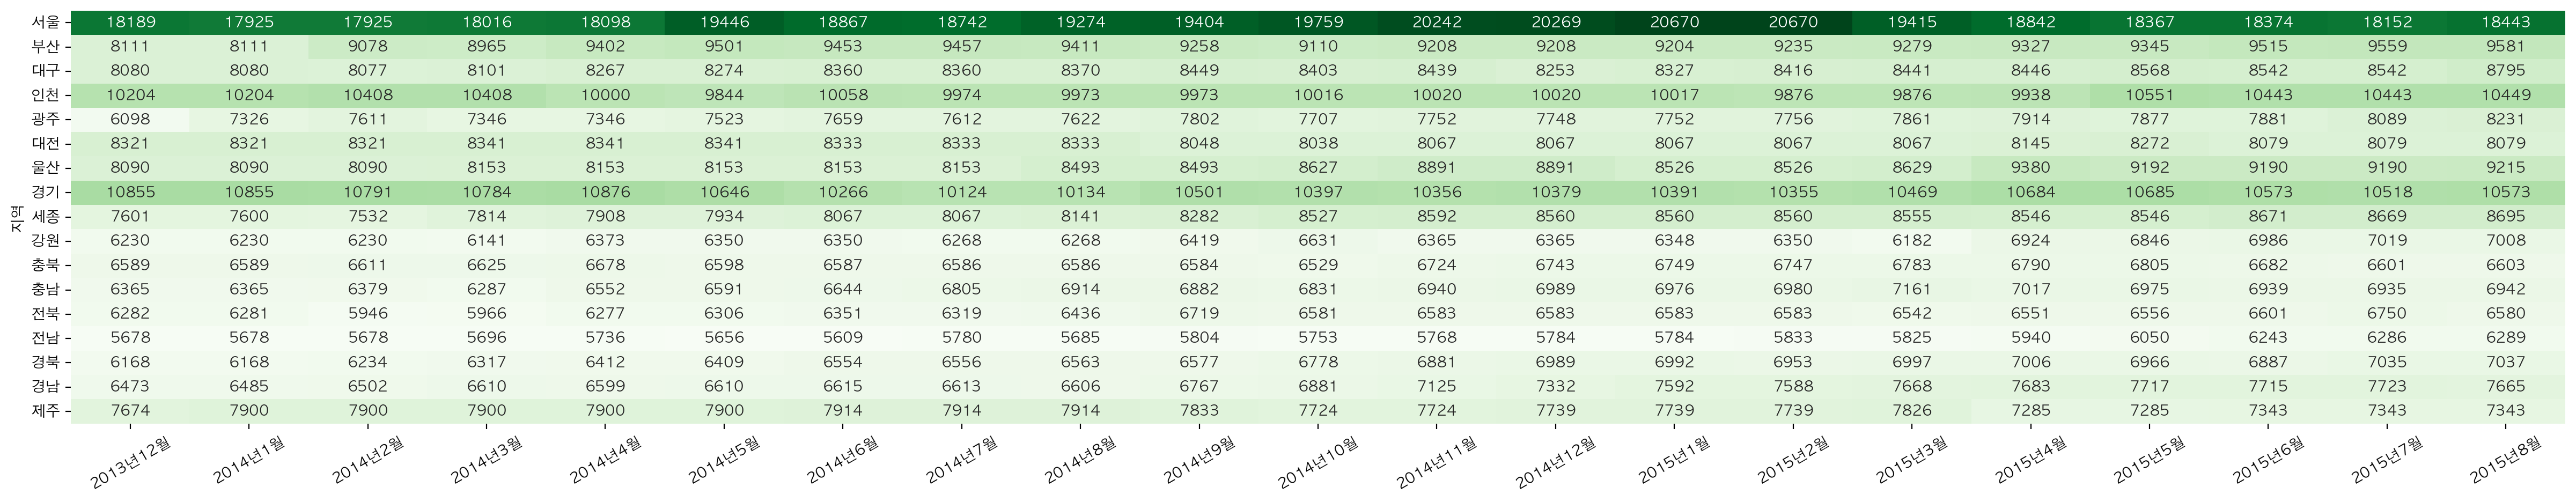

In [26]:
# 문제 1)
df_first = pd.read_csv('/Volumes/DATA/mbc/ai_x/download/shareData/부동산_250213/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                      encoding='cp949')
df_first.sample()
df_first.shape
pd.options.display.max_columns = 22
# df_first.tail(1)
# df_first.info()
# df_first.isna().sum()
df_first.set_index('지역', inplace=True)
# df_first.head()
plt.figure(figsize=(30, 5))
sns.heatmap(df_first, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xticks(rotation=30)
plt.show()

In [96]:
# 문제2)
ex = pd.read_csv('/Volumes/DATA/mbc/ai_x/download/shareData/부동산_250213/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv',
                encoding='cp949')
# ex.head()
# print('전체 갯수 :', ex.shape[0])
# print('결측치 아닌 갯수 :', ex['분양가격(제곱미터)'].notna().sum())
# print('결측치 갯수 :', ex['분양가격(제곱미터)'].isna().sum())
# ex[ex['분양가격(제곱미터)'].isnull()].head(2)
type(ex.loc[368, '분양가격(제곱미터)']), type(ex.loc[0, '분양가격(제곱미터)'])
# ex[ex['분양가격(제곱미터)'].isnull()].head(2)
pd.to_numeric(ex['분양가격(제곱미터)'], errors='coerce').isna().sum()
ex[ex['분양가격(제곱미터)'].str.strip() == ''].head(1)
nanex = ex.loc[368] # 분양가격이 결측치
spaceex = ex.loc[28] # 분양가격이 space
nanex, spaceex, ex.loc[0] # 분양가격이 정상
def get_pricelen(row):
    price = row['분양가격(제곱미터)']
    # np.isnan(스칼라변수) : 스칼라변수가 결측치(np.nan)인지 여부
    # pd.isna(스칼라변수) : 스칼라변수가 결측치(np.nan, None)인지 여부
    # pd.notnull(스칼라변수) : 결측치가 아닌지 여부
    # 1차원이나2차원변수.isna() : 결측치 여부
    if pd.notnull(price) and price.strip()!='':
        return len(price)
    else:
        return 0
    
get_pricelen(nanex), get_pricelen(spaceex), get_pricelen(ex.loc[0])
ex['자리수'] = ex.apply(get_pricelen, axis=1)
ex.head(2)
ex.자리수.unique()
ex.index.name = 'idx'
ex.head(2)
ex = ex.reset_index()
ex.head(2)
ex[(ex.자리수 == 5) & (ex.idx%5==0)].head(1)
nanex = ex.loc[368] # 분양가격이 결측치
spaceex = ex.loc[28] # 분양가격이 space
def comma_append(row):
    price = row['분양가격(제곱미터)']
    if (row.idx%5==0) & (row.자리수>=4):
        price = price[:-3] + ',' + price[-3:]
    return price
    
comma_append(nanex), comma_append(spaceex), comma_append(ex.loc[1]),\
comma_append(ex.loc[0]), comma_append(ex.loc[8245])
ex['분양가격(제곱미터)'] = ex.apply(comma_append, axis=1)
ex.head(6)
ex.drop(['idx','자리수'], axis=1, inplace=True)
ex.to_csv('data/전국제곱미터당분양가격(2015년10월부터).csv', 
          # encoding='cp949',
          # sep='\t'
          index=False)

df_last = pd.read_csv('data/전국제곱미터당분양가격(2015년10월부터).csv')
# display(df_last.head(1))
# print(df_last.shape)
# df_last.isna().sum()
# df_last.notna().sum()

def commadrop(row):
    # pd.options.mode.copy_on_write = True
    row = row.copy()
    price = row['분양가격(제곱미터)']
    if pd.isna(price): # np.nan이거나 None인지 여부
        row['제곱미터분양가격'] = np.nan
    elif price.strip() == '': # space면 np.nan로
        row['제곱미터분양가격'] = np.nan
    elif price.find(',')!=-1: # 콤마가 있으면 콤마 없애기
        # row['분양가격(제곱미터)'] = price.replace(',','')
        row['제곱미터분양가격'] = ''.join(price.split(','))
    else:
        row['제곱미터분양가격'] = price
    return row
df_last
df_last = df_last.apply(commadrop, axis=1)
df_last.head(2)
df_last['제곱미터분양가격'] = df_last['제곱미터분양가격'].astype(np.float64)
df_last.drop(['제곱미터분양가격'], axis=1, inplace=True)
df_last.sample(1)
def commadrop2(price):
    #if price is np.nan:
    #if np.isnan(price):
    if pd.isna(price):
        return np.nan
    elif price.strip() == '':
        return np.nan
    elif price.find(',') != -1:
        return int(price.replace(',',''))
    else:
        return int(price)
df_last['제곱미터당분양가격'] = df_last['분양가격(제곱미터)'].map(commadrop2)
df_last.tail()
df_last['평당분양가격'] = df_last['제곱미터당분양가격']*3.3
df_last.head()
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적','')\
                .str.replace('제곱미터','m²')\
                .str.replace('초과','~')\
                .str.replace('이하','').str.replace(' ','')
df_last['전용면적']
# print(df_last['규모구분'].unique())
# print(df_last['전용면적'].unique())
df_last.drop(['규모구분', '분양가격(제곱미터)', '제곱미터당분양가격'], 
             axis=1,
             inplace=True)
df_last

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60m²
2,서울,2015,10,19410.6,60m²~85m²
3,서울,2015,10,18879.3,85m²~102m²
4,서울,2015,10,19400.7,102m²~
...,...,...,...,...,...
9090,제주,2024,8,25419.9,모든면적
9091,제주,2024,8,NaN,60m²
9092,제주,2024,8,24799.5,60m²~85m²
9093,제주,2024,8,NaN,85m²~102m²


In [99]:
# 문제3) 
r = df_last.pivot_table(index='연도',
                   columns='지역명',
                   values='평당분양가격')
r

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.940,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400000,20315.680000,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800000
2016,7162.903846,11684.970,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535000,21753.435000,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335000
2017,7318.850000,12296.185,8806.600000,8288.063793,9599.700000,12191.972222,9912.910526,11637.615000,21864.095000,9132.945763,10630.160870,11672.430000,7413.230000,7406.126316,12628.539623,8157.315517,7462.565000
2018,8219.255000,14258.420,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965000,23202.245000,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295000
2019,8934.475000,15665.540,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865000,28286.830000,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875000
2020,10302.423214,15106.080,10919.272222,9997.693750,13406.485714,15314.200000,11238.844737,13353.010000,29781.015000,11628.100000,12837.600000,14982.990000,9562.398214,8559.430000,14192.876923,9139.380000,8358.956897
2021,10291.325000,14567.080,11302.335000,11227.150000,13709.850000,15586.285000,11994.216667,14317.655000,29380.450000,12578.060000,14191.953061,15774.330000,9980.760000,9047.928814,22302.342857,9860.741379,8822.385000
2022,11644.215000,16621.550,12455.685000,12018.050000,15095.885106,16821.915000,14113.880000,18166.835593,29128.531034,11309.971698,17903.751724,17341.830000,10635.508475,10003.070000,18953.825000,11730.345000,10033.540000
2023,13409.385000,20175.210,13283.182759,13025.320000,17957.852830,17656.747059,17917.288889,20470.850847,33230.560000,12278.200000,18832.093220,16150.695000,11846.682692,10966.024528,24095.901923,12580.590000,11103.950000


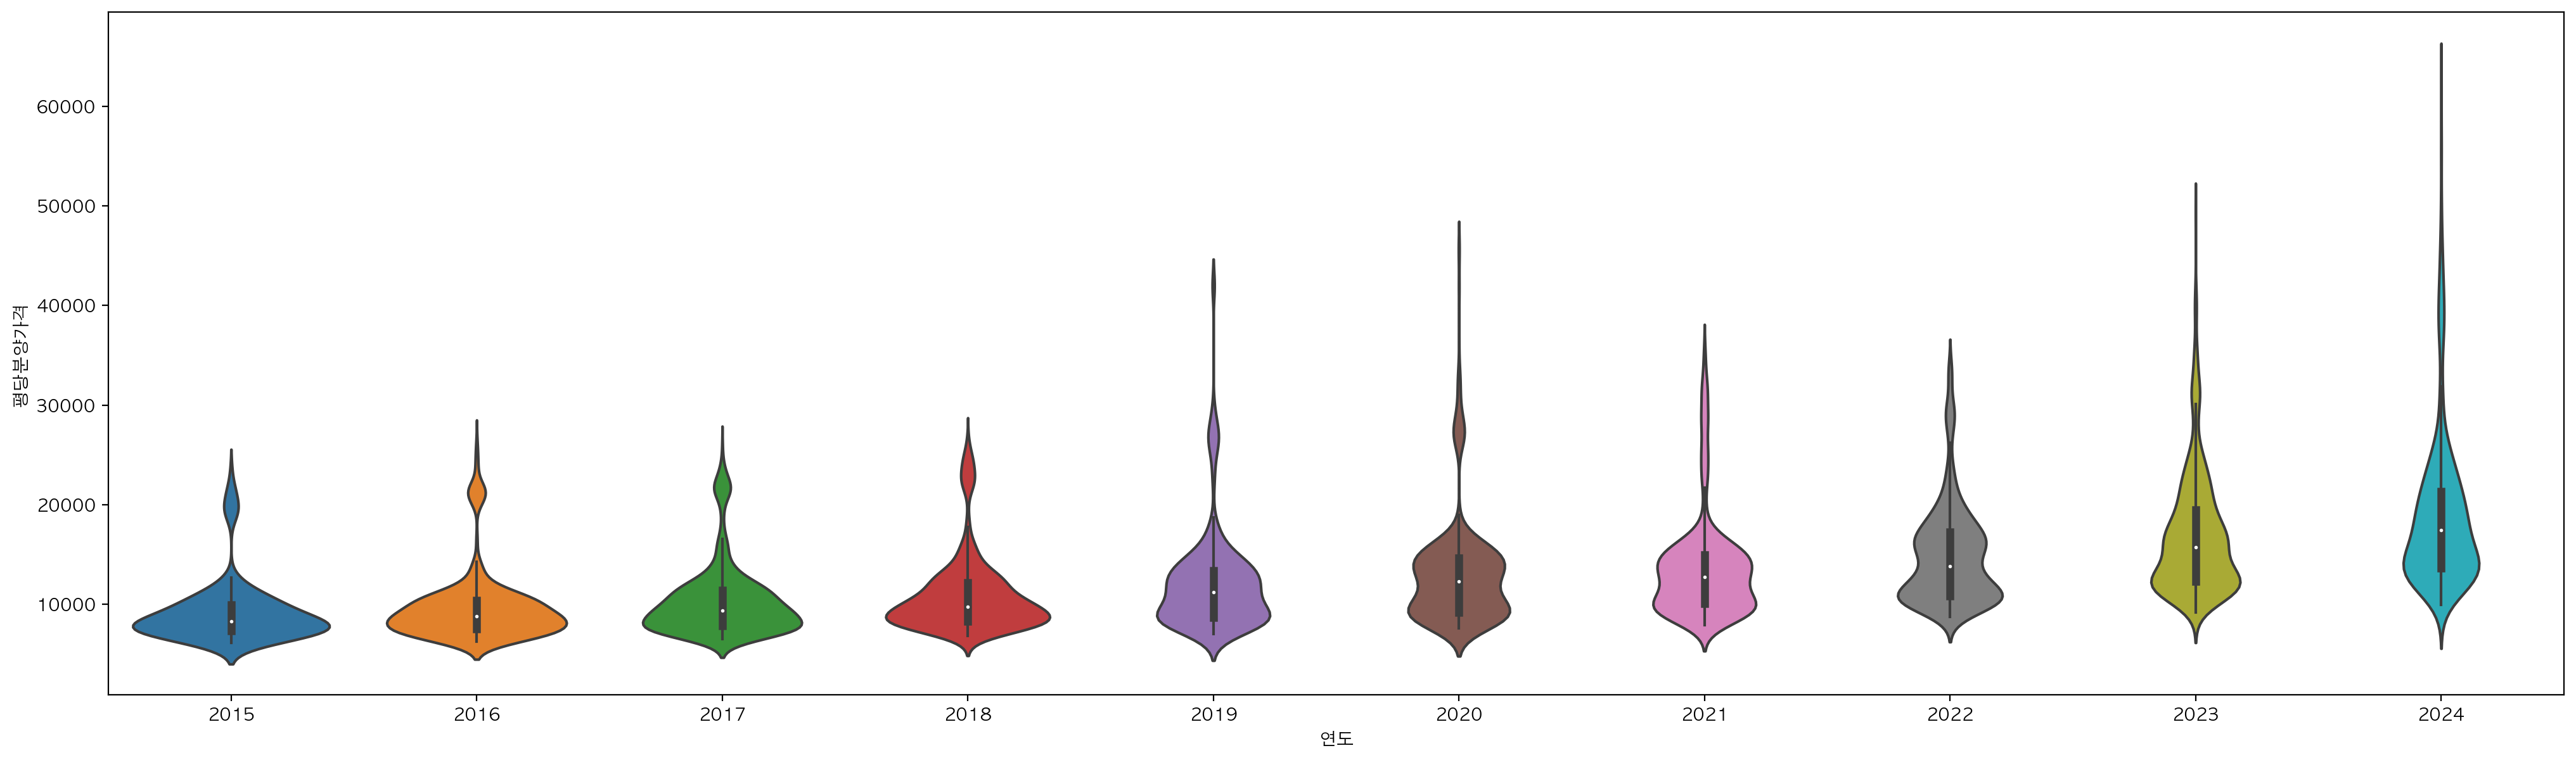

In [103]:
# 문제4)
plt.figure(figsize=(25, 7))
sns.violinplot(data=df_last, x="연도", y="평당분양가격")

plt.show()

In [104]:
# 문제5)
df_first = pd.read_csv('/Volumes/DATA/mbc/ai_x/download/shareData/부동산_250213/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                      encoding='cp949')
df_first.sample()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,2014년10월,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
5,대전,8321,8321,8321,8341,8341,8341,8333,8333,8333,8048,8038,8067,8067,8067,8067,8067,8145,8272,8079,8079,8079


In [105]:
new_first = df_first.melt(id_vars='지역', var_name='연도월', value_name='평당분양가격')
new_first.head()

,지역,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [106]:
def parse_year(data):
    return int(data.split('년')[0])

def parse_month(data):
    return int(data.split('년')[1].replace("월", ''))

In [107]:
new_first['연도'] = new_first['연도월'].map(lambda data: int(data.split('년')[0]))
new_first.head()

,지역,연도월,평당분양가격,연도
0,서울,2013년12월,18189,2013
1,부산,2013년12월,8111,2013
2,대구,2013년12월,8080,2013
3,인천,2013년12월,10204,2013
4,광주,2013년12월,6098,2013


In [108]:
new_first['월'] = new_first['연도월'].apply(lambda data: int(data.split('년')[1][:-1]))
new_first.head()

,지역,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [109]:
new_first.drop('연도월', axis=1, inplace=True)

In [110]:
new_first.head(1)

,지역,평당분양가격,연도,월
0,서울,18189,2013,12


In [111]:
new_first.columns = ['지역명','평당분양가격','연도','월']
new_first.tail(1) # new_first concat 준비완료

,지역명,평당분양가격,연도,월
356,제주,7343,2015,8


In [112]:
new_last = df_last[df_last.전용면적 == '모든면적'].copy()
new_last.drop('전용면적', axis=1, inplace=True)

In [113]:
df = pd.concat([new_first, new_last], axis=0)
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9045, 9050, 9055, 9060, 9065, 9070, 9075, 9080, 9085, 9090],
           dtype='int64', length=2176)

In [114]:
df.reset_index(drop=True, inplace=True)

In [117]:
df = df[['지역명','평당분양가격','연도','월']]
df

,지역명,평당분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
2171,전북,12058.2,2024,8
2172,전남,13120.8,2024,8
2173,경북,13827.0,2024,8
2174,경남,13252.8,2024,8
